In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle, compute_class_weight
from sklearn.ensemble import RandomForestClassifier

In [37]:
train_csv = pd.read_csv(os.getcwd()+"\\"+"Training Data.csv")
train_csv.head()

,clientid_cr,clmbuserid_cr,conversiontime_cr,imprid_cr,adslotdimid_cr,algo_cr,audiences_cr,clickbid_cr,geodimid_cr,ip_cr,...,cityGrpDimId_cr,siteClusterIds_cr,refClusterId_cr,paid_cr,spend_cr,attributionType_cr,conversionid_cr,optimize_on_cr,bundleId_cr,conversion_fraud
0,75694,31629cd0-0b34-460f-aa61-80c3234e1225-1sjfw,1.620000e+12,01649076-c77f-4d70-afc8-213535427147-1sjd4,321300,38.0,"8gw,o3b",2.869316,144,XXX.XXX.XXX.XXX,...,348007.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,75694,4c98f114-c34c-48f4-84d6-50fc8e9b6d65-10wgg,1.620000e+12,f84d83b9-b757-4f97-9813-34f8dcc57cc5-1sjfw,129239,38.0,"8kv,2vk,8gw,2vl",2.790000,144,XXX.XXX.XXX.XXX,...,348010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2,75694,cd92087a-54b0-4911-bc3d-1144a3c2babd-1sjlg,1.620000e+12,061edef6-3d9d-408b-884a-ad840e6930ce-10o78,321554,21.0,"8gw,o3b",2.790000,144,XXX.XXX.XXX.XXX,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,75694,f79f3de7-5edb-4319-9549-117f47996066-10wrk,1.620000e+12,0a937239-9091-4bb7-b26b-37d4bb29e50b-10oa0,321300,38.0,"8gw,o3b",2.790000,144,XXX.XXX.XXX.XXX,...,348007.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
4,30431,01fd1a8a-c3f8-4b57-94ff-66318d0f63c7-1sjts,1.620000e+12,0d46d0d4-8fc6-4d95-aaa1-406354a8400c-1sjo8,355768,21.0,NaN,NaN,144,XXX.XXX.XXX.XXX,...,NaN,NaN,NaN,1.0,275.0,1.0,NaN,NaN,NaN,True


In [38]:
train_csv['conversion_fraud'] = train_csv['conversion_fraud'].astype('int')
train_csv['conversion_fraud'].value_counts()

0    834
1    131
Name: conversion_fraud, dtype: int64

In [39]:
train_csv.isna().sum().sort_values()

clientid_cr                        0
goalTypeId_cr                      0
lookUpFrom_cr                      0
pricingtype_cr                     0
adLogType_cr                       0
time_cr                            0
goalid_cr                          0
siteId_cr                          0
pubclientid_cr                     0
itemid_cr                          0
conversion_fraud                   0
geodimid_cr                        0
itemcolumbiaid_cr                  0
clmbuserid_cr                      0
adslotdimid_cr                     0
imprid_cr                          0
conversiontime_cr                  0
v_cr                               1
ip_cr                             20
geoGrpDimId_cr                    20
uuidSource_cr                     20
impressionTimeInMillis_cr         20
countryDimId_cr                   20
ispDimId_cr                       20
connTypeDimId_cr                  20
stateId_cr                        20
conversionDurationInMillis_cr     20
a

In [40]:
class_zero = train_csv[train_csv['conversion_fraud'] == 0]
class_one = train_csv[train_csv['conversion_fraud'] == 1]
cols = []
cc = []
for ss in list(train_csv.isna().sum().sort_values().items()):
    if 0 < ss[-1] < 50 and train_csv[ss[0]].dtype is not object:
        try:
#             print(train_csv[ss[0]].dtype)
#             print(train_csv[ss[0]].mean())
#             print("#######################", ss[0])
#             print(train_csv[ss[0]].min())
#             print(train_csv[ss[0]].max())
#             print(train_csv[ss[0]].value_counts())
            train_csv[ss[0]+'_msh'] = train_csv[ss[0]].fillna(train_csv[ss[0]].mean())
            cols.append(ss[0]+'_msh')
        except:
            pass
    elif ss[-1] == 0:
        cols.append(ss[0])
    else:
        cc.append(ss[0])
train_csv[cols].isna().sum()

clientid_cr                          0
goalTypeId_cr                        0
lookUpFrom_cr                        0
pricingtype_cr                       0
adLogType_cr                         0
time_cr                              0
goalid_cr                            0
siteId_cr                            0
pubclientid_cr                       0
itemid_cr                            0
conversion_fraud                     0
geodimid_cr                          0
itemcolumbiaid_cr                    0
clmbuserid_cr                        0
adslotdimid_cr                       0
imprid_cr                            0
conversiontime_cr                    0
v_cr_msh                             0
geoGrpDimId_cr_msh                   0
uuidSource_cr_msh                    0
impressionTimeInMillis_cr_msh        0
countryDimId_cr_msh                  0
ispDimId_cr_msh                      0
stateId_cr_msh                       0
conversionDurationInMillis_cr_msh    0
algo_cr_msh              

In [41]:
train_csv[cols].describe(include='all')

,clientid_cr,goalTypeId_cr,lookUpFrom_cr,pricingtype_cr,adLogType_cr,time_cr,goalid_cr,siteId_cr,pubclientid_cr,itemid_cr,...,ispDimId_cr_msh,stateId_cr_msh,conversionDurationInMillis_cr_msh,algo_cr_msh,cityId_cr_msh,position_cr_msh,modelDimId_cr_msh,browserId_cr_msh,osId_cr_msh,osVerDimId_cr_msh
count,965.000000,965.0,965.000000,965.000000,965.000000,9.650000e+02,965.000000,965.000000,965.000000,9.650000e+02,...,965.000000,965.000000,9.650000e+02,965.000000,965.000000,9.650000e+02,965.000000,965.000000,965.000000,965.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,62726.958549,10.0,1.883938,15.668394,1.863212,1.620000e+12,6067.012435,1229.482902,24496.811399,5.020330e+07,...,209529.746032,12713.389418,1.823122e+07,137.262434,8818.281481,2.125528e+07,143725.449153,123088.689619,173837.368644,227607.407839
std,25456.725592,0.0,0.320466,2.343413,0.343801,0.000000e+00,2666.102943,1413.498667,31611.018560,4.804771e+06,...,73838.319868,36267.338303,1.568823e+08,1669.933690,30950.693932,6.392901e+07,90987.950297,31812.425052,33371.273047,90553.942646
min,802.000000,10.0,1.000000,6.000000,1.000000,1.620000e+12,82.000000,3.000000,1.000000,2.050601e+07,...,0.000000,0.000000,2.000000e+02,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,64588.000000,10.0,2.000000,16.000000,2.000000,1.620000e+12,6384.000000,34.000000,2501.000000,4.950416e+07,...,136127.000000,1806.000000,3.185000e+03,18.000000,435.000000,1.000000e+00,0.000000,129408.000000,129311.000000,199414.000000
50%,75694.000000,10.0,2.000000,16.000000,2.000000,1.620000e+12,6384.000000,179.000000,15240.000000,4.950416e+07,...,265618.000000,1810.000000,8.456000e+03,33.000000,439.000000,1.000000e+00,202038.000000,129639.000000,196058.000000,199452.000000
75%,75694.000000,10.0,2.000000,16.000000,2.000000,1.620000e+12,6384.000000,2930.000000,16211.000000,5.318289e+07,...,280429.000000,1818.000000,1.119590e+05,38.000000,10256.000000,3.000000e+00,202038.000000,129639.000000,196061.000000,227607.407839


In [42]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
useless = ['goalTypeId_cr', 'time_cr', 'conversiontime_cr']
X = train_csv[cols].drop(columns=['clmbuserid_cr', 'imprid_cr', 'conversion_fraud']+useless)

# X = X.dropna(axis='columns')

# X.head()

y = train_csv['conversion_fraud']
best_features = SelectKBest(score_func=chi2, k=10)
df = pd.DataFrame(best_features.fit(X,y).scores_)
dfcolumns = pd.DataFrame(X.columns)
feature_scores = pd.concat([dfcolumns,df],axis=1)
feature_scores.columns = ['Features','Score']  
print(feature_scores.nlargest(10,'Score')) 

                             Features         Score
18  conversionDurationInMillis_cr_msh  2.668349e+09
21                    position_cr_msh  6.378646e+08
25                  osVerDimId_cr_msh  9.407085e+05
6                      pubclientid_cr  5.472483e+05
17                     stateId_cr_msh  5.380267e+05
14      impressionTimeInMillis_cr_msh  2.619438e+05
23                   browserId_cr_msh  1.844966e+05
7                           itemid_cr  9.548788e+04
0                         clientid_cr  7.852621e+04
8                         geodimid_cr  3.457563e+04


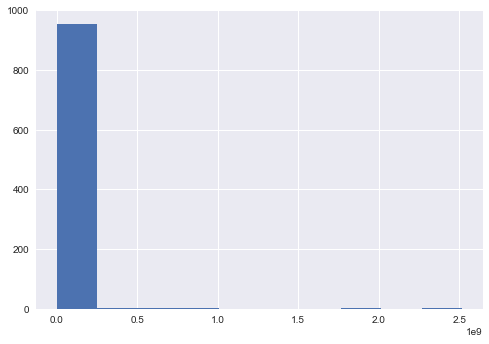

In [43]:
train_csv['conversionDurationInMillis_cr_msh'].hist()
plt.show()

In [44]:
feature_scores.sort_values(by='Score', ascending=False)['Features'].values[:10]

array(['conversionDurationInMillis_cr_msh', 'position_cr_msh',
       'osVerDimId_cr_msh', 'pubclientid_cr', 'stateId_cr_msh',
       'impressionTimeInMillis_cr_msh', 'browserId_cr_msh', 'itemid_cr',
       'clientid_cr', 'geodimid_cr'], dtype=object)

In [45]:
selected_features = ['conversionDurationInMillis_cr_msh', 'position_cr_msh',
       'osVerDimId_cr_msh', 'pubclientid_cr', 'stateId_cr_msh',
       'impressionTimeInMillis_cr_msh', 'browserId_cr_msh', 'itemid_cr',
       'clientid_cr', 'geodimid_cr']
temp = []
for sf in selected_features:
    train_csv[sf+'_scaled'] = train_csv[sf]/train_csv[sf].max()  
    temp.append(sf+'_scaled')

In [46]:
selected_data = train_csv[temp+['conversion_fraud']]

In [47]:
from sklearn.model_selection import train_test_split
feat = train_csv[temp]
labels =  train_csv['conversion_fraud']
X_train, X_test, y_train, y_test = train_test_split(feat, labels, test_size=0.20, random_state=42, stratify=labels)
y_train.value_counts()

0    667
1    105
Name: conversion_fraud, dtype: int64

In [48]:
model = RandomForestClassifier(class_weight='balanced', bootstrap=True, max_depth=80, max_features=3, 
                               min_samples_leaf=3, min_samples_split=10, n_estimators=200)
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.9650259067357513

In [49]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(feat, labels, test_size=0.20, random_state=42, stratify=labels)

model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)
print(model.score(X_train, y_train))

print(classification_report(y_test, model.predict(X_test)))

0.977979274611399
             precision    recall  f1-score   support

          0       0.94      1.00      0.97       167
          1       1.00      0.58      0.73        26

avg / total       0.95      0.94      0.94       193

